In [125]:
import numpy as np
import pandas as pd

## Quiz_1

- 아래와 같은 데이터 프레임을 만드세요.
- 아래와 같이 데이터가 나오도록 코드를 추가하시면 됩니다.
- 점수는 50~100의 숫자가 랜덤으로 들어갑니다.
- 이름은 아래의 이름에서 랜덤으로 중복되지 않도록 10명을 뽑으세요
- names = ['Adam', 'Alan', 'Alex', 'Alvin', 'Andrew', 'Anthony', 'Arnold', 'Baldy', 'Baron', 'Billy', 'Boris', 'Bruno', 'Caley', 'Champ', 'Charlie', 'Clark']
- total 데이터를 나타내는 컬럼을 추가하세요
- get_grade 함수를 이용해서 total 데이터에 대한 grade 컬럼을 출력하세요
- 뽑은 데이터의 Grade로 오름차순 하세요


In [95]:
number = 10
names = ['Adam', 'Alan', 'Alex', 'Alvin', 'Andrew', 'Anthony', 'Arnold', 'Baldy', 
         'Baron', 'Billy', 'Boris', 'Bruno', 'Caley', 'Champ', 'Charlie', 'Clark']

df = pd.DataFrame(columns=["Name","Math","Science","English"])

# set data
def get_score(rows=number):
    return [np.random.randint(50, 100) for _ in range(rows)]

df["Name"] = random.sample(names, number)
df["Math"] = get_score()
df["Science"] = get_score()
df["English"] = get_score()
df["Total"] = df["Math"] + df["Science"] + df["English"]
df["Grade"] = [get_grade(df["Total"][i]) for i in range(number)]

# set total

# set grades
def get_grade(point):
    if point >= 270:
        return "A"
    elif point > 240:
        return "B"
    elif point >= 210:
        return "C"
    elif point >= 180:
        return "D"
    else:
        return "F"

# set sort
df.sort_values(by="Grade", ascending=True).reset_index(drop=True)

,Name,Math,Science,English,Total,Grade
0,Anthony,70,73,98,241,B
1,Alex,83,82,88,253,B
2,Clark,72,88,83,243,B
3,Caley,72,94,98,264,B
4,Alan,93,57,92,242,B
5,Boris,85,73,69,227,C
6,Billy,67,77,75,219,C
7,Alvin,98,53,70,221,C
8,Adam,62,82,79,223,C
9,Arnold,57,58,55,170,F


### Quiz_2
- 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리세요

In [282]:
# 타이타닉 데이터 가져오기

titanic = pd.read_csv('train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [283]:
# ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제

titanic_df = titanic[["Survived", "Age"]].dropna().reset_index(drop=True)
titanic_df.tail()

,Survived,Age
709,0,39.0
710,0,27.0
711,1,19.0
712,1,26.0
713,0,32.0


In [286]:
# Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입
titanic_df["Age"] = titanic_df["Age"].astype(int)
titanic_df["Ages"] = (titanic_df["Age"] // 10) * 10

titanic_df.tail()

,Survived,Age,Ages
709,0,39,30
710,0,27,20
711,1,19,10
712,1,26,20
713,0,32,30


In [277]:
# 연령대별로 생존률

In [287]:
titanic_df = titanic_df.groupby(["Ages", "Survived"]).size().reset_index(name = "Counts")
titanic_df = titanic_df.pivot("Ages", "Survived", "Counts")
titanic_df

Survived,0,1
Ages,,
0,24.0,38.0
10,61.0,41.0
20,143.0,77.0
30,94.0,73.0
40,55.0,34.0
50,28.0,20.0
60,13.0,6.0
70,6.0,NaN
80,NaN,1.0


In [288]:
titanic_df["survived_rate"] = round(titanic_df[1] / (titanic_df[0] + titanic_df[1]) * 100, 2)
titanic_df

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58
70,6.0,NaN,NaN
80,NaN,1.0,NaN


In [327]:
titanic_df["survived_rate"] = round(titanic_df[1] / (titanic_df[0] + titanic_df[1]) * 100, 2)
result = titanic_df.dropna()
result

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


In [12]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [358]:
result.rename(columns = {0:"non_survived", 1:"survived"})
result

Survived,non_survived,survived,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


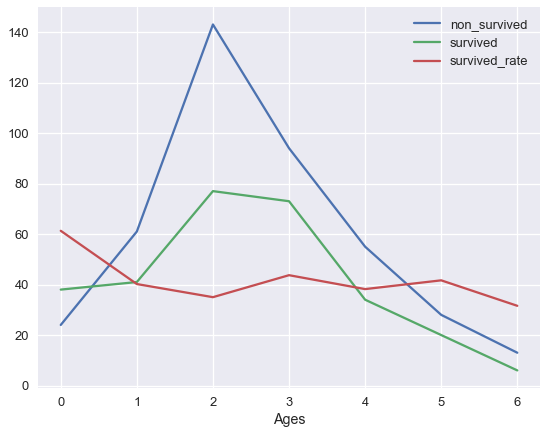

In [376]:
y1 = result["non_survived"].reset_index(drop=True)
y2 = result["survived"].reset_index(drop=True)
y3 = result["survived_rate"].reset_index(drop=True)

plt.figure(figsize = (9, 7))
sns.set_context("talk")

plt.plot(y1, label = "non_survived")
plt.plot(y2, label = "survived")
plt.plot(y3, label = "survived_rate")

plt.xlabel("Ages")
plt.legend(loc = 0)
plt.show()